In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### DATA PREPROCESSING 

In [222]:
df = pd.read_csv('Indian_Kids_Screen_Time.csv',lineterminator= '\n')

In [223]:
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [225]:
df['Primary_Device'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Smartphone
1           Laptop
2               TV
3           Laptop
4       Smartphone
           ...    
9707    Smartphone
9708    Smartphone
9709    Smartphone
9710            TV
9711            TV
Name: Primary_Device, Length: 9712, dtype: object>

In [226]:
df.duplicated().sum()

np.int64(44)

In [227]:
df.describe()

,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9712.000000,9712.000000,9712.000000
mean,12.979201,4.352837,0.427226
std,3.162437,1.718232,0.073221
min,8.000000,0.000000,0.300000
25%,10.000000,3.410000,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


### EDA - EXPLORATORY DATA ANALYSIS


In [228]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
df.drop_duplicates(inplace=True)

In [229]:
print(df.columns.tolist())


['age', 'gender', 'avg_daily_screen_time_hr', 'primary_device', 'exceeded_recommended_limit', 'educational_to_recreational_ratio', 'health_impacts', 'urban_or_rural']


In [230]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns.tolist())


['age', 'gender', 'avg_daily_screen_time_hr', 'primary_device', 'exceeded_recommended_limit', 'educational_to_recreational_ratio', 'health_impacts', 'urban_or_rural']


In [231]:
bins = [4, 10, 15, 20]
labels = ['5-10 yrs', '11-15 yrs', '16-20 yrs']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
df[['age', 'age_group']]


,age,age_group
0,14,11-15 yrs
1,11,11-15 yrs
2,18,16-20 yrs
3,15,11-15 yrs
4,12,11-15 yrs
...,...,...
9707,17,16-20 yrs
9708,17,16-20 yrs
9709,16,16-20 yrs
9710,17,16-20 yrs


In [232]:
print(df.columns.tolist())


['age', 'gender', 'avg_daily_screen_time_hr', 'primary_device', 'exceeded_recommended_limit', 'educational_to_recreational_ratio', 'health_impacts', 'urban_or_rural', 'age_group']


In [233]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns.tolist())  # Check new names


['age', 'gender', 'avg_daily_screen_time_hr', 'primary_device', 'exceeded_recommended_limit', 'educational_to_recreational_ratio', 'health_impacts', 'urban_or_rural', 'age_group']


In [234]:
df['primary_device'] = df['primary_device'].str.strip().str.title()


In [235]:
df.head()

,age,gender,avg_daily_screen_time_hr,primary_device,exceeded_recommended_limit,educational_to_recreational_ratio,health_impacts,urban_or_rural,age_group
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,11-15 yrs
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,11-15 yrs
2,18,Female,3.73,Tv,True,0.32,Poor Sleep,Urban,16-20 yrs
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban,11-15 yrs
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,11-15 yrs


### Categorizing Educational to Recreational Screen Usage

The `Educational_to_Recreational_Ratio` column in our dataset is currently a continuous numeric value ranging from **0.30 to 0.60**. While this provides detailed granularity, it can be hard to interpret at a glance. To make this variable more meaningful for analysis and visualization, we converted it into **three distinct categories** based on thresholds:

- **Mostly Recreational**: Ratio less than 0.40
- **Balanced**: Ratio between 0.40 and 0.49
- **Mostly Educational**: Ratio 0.50 and above

This transformation helps group students by how they primarily use their screen time — either for **learning**, **entertainment**, or a **balanced** mix of both.

We implemented this using a simple custom function with the `apply()` method in pandas. The new column created is named `usage_category`.

This enables deeper insights when exploring trends by age, device type, or total screen time.


In [236]:
def categorize_ratio(ratio):
    if ratio < 0.4:
        return 'Mostly Recreational'
    elif 0.4 <= ratio < 0.5:
        return 'Balanced'
    else:
        return 'Mostly Educational'

df['usage_category'] = df['educational_to_recreational_ratio'].apply(categorize_ratio)
df.head()

,age,gender,avg_daily_screen_time_hr,primary_device,exceeded_recommended_limit,educational_to_recreational_ratio,health_impacts,urban_or_rural,age_group,usage_category
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,11-15 yrs,Balanced
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,11-15 yrs,Mostly Recreational
2,18,Female,3.73,Tv,True,0.32,Poor Sleep,Urban,16-20 yrs,Mostly Recreational
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban,11-15 yrs,Mostly Recreational
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,11-15 yrs,Balanced


### Health Impact Classification Based on Screen Usage

To interpret screen time in terms of children's well-being, we classified each student into a **Health Impact Level** based on their screen usage patterns.

The logic is derived from the assumption that:
- High recreational use may lead to negative outcomes such as poor sleep and low physical activity.
- Balanced usage poses moderate risk.
- Mostly educational usage is generally healthier.

| Usage Category         | Health Impact     |
|------------------------|-------------------|
| Mostly Recreational    | High Risk         |
| Balanced               | Moderate Risk     |
| Mostly Educational     | Low Risk          |

This transformation adds a behavioral health context to the analysis, helping in assessing screen time not just quantitatively, but also qualitatively.


In [237]:
def assign_health_risk(category):
    if category == 'Mostly Recreational':
        return 'High Risk'
    elif category == 'Balanced':
        return 'Moderate Risk'
    else:
        return 'Low Risk'

df['health_impact_level'] = df['usage_category'].apply(assign_health_risk)
df.head()

,age,gender,avg_daily_screen_time_hr,primary_device,exceeded_recommended_limit,educational_to_recreational_ratio,health_impacts,urban_or_rural,age_group,usage_category,health_impact_level
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,11-15 yrs,Balanced,Moderate Risk
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,11-15 yrs,Mostly Recreational,High Risk
2,18,Female,3.73,Tv,True,0.32,Poor Sleep,Urban,16-20 yrs,Mostly Recreational,High Risk
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban,11-15 yrs,Mostly Recreational,High Risk
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,11-15 yrs,Balanced,Moderate Risk


In [238]:
df['daily_screen_time_min'] = (df['avg_daily_screen_time_hr'] * 60).round().astype(int)
df.drop(columns=['avg_daily_screen_time_hr'], inplace=True)
df['daily_screen_time_min'] = df['daily_screen_time_min'].astype(int)
df.head()

,age,gender,primary_device,exceeded_recommended_limit,educational_to_recreational_ratio,health_impacts,urban_or_rural,age_group,usage_category,health_impact_level,daily_screen_time_min
0,14,Male,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,11-15 yrs,Balanced,Moderate Risk,239
1,11,Female,Laptop,True,0.30,Poor Sleep,Urban,11-15 yrs,Mostly Recreational,High Risk,277
2,18,Female,Tv,True,0.32,Poor Sleep,Urban,16-20 yrs,Mostly Recreational,High Risk,224
3,15,Female,Laptop,False,0.39,NaN,Urban,11-15 yrs,Mostly Recreational,High Risk,73
4,12,Female,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,11-15 yrs,Balanced,Moderate Risk,353


### Categorizing Screen Time Risk Based on Age and Usage

To make our screen time analysis more actionable and informative, we transformed the raw screen time values into meaningful risk categories.

Rather than using a simple True/False flag to indicate whether a child exceeded the recommended screen time, we introduced a new column: **`screen_time_risk`**, which classifies each student into one of three health impact levels:

#### Classification Logic:

| Age Group     | Recommended Daily Limit | Category                |
|---------------|--------------------------|--------------------------|
| ≤ 10 years    | ≤ 90 minutes             | - Within Limit  <br> - Slightly Over Limit (91–150 mins) <br> - Excessive Usage (>150 mins) |
| 11–15 years   | ≤ 120 minutes            | - Within Limit  <br> - Slightly Over Limit (121–180 mins) <br> - Excessive Usage (>180 mins) |
| 16–20 years   | ≤ 150 minutes            | - Within Limit  <br> - Slightly Over Limit (151–210 mins) <br> - Excessive Usage (>210 mins) |

The new `screen_time_risk` column will be used in later sections to analyze trends and visualize health impacts.


In [239]:
def screen_time_category(row):
    if row['age'] <= 10:
        if row['daily_screen_time_min'] <= 90:
            return 'Within Limit'
        elif row['daily_screen_time_min'] <= 150:
            return 'Slightly Over Limit'
        else:
            return 'Excessive Usage'
        
    elif row['age'] <= 15:
        if row['daily_screen_time_min'] <= 120:
            return 'Within Limit'
        elif row['daily_screen_time_min'] <= 180:
            return 'Slightly Over Limit'
        else:
            return 'Excessive Usage'
        
    else:
        if row['daily_screen_time_min'] <= 150:
            return 'Within Limit'
        elif row['daily_screen_time_min'] <= 210:
            return 'Slightly Over Limit'
        else:
            return 'Excessive Usage'

df['screen_time_risk'] = df.apply(screen_time_category, axis=1)
df.head()

,age,gender,primary_device,exceeded_recommended_limit,educational_to_recreational_ratio,health_impacts,urban_or_rural,age_group,usage_category,health_impact_level,daily_screen_time_min,screen_time_risk
0,14,Male,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,11-15 yrs,Balanced,Moderate Risk,239,Excessive Usage
1,11,Female,Laptop,True,0.30,Poor Sleep,Urban,11-15 yrs,Mostly Recreational,High Risk,277,Excessive Usage
2,18,Female,Tv,True,0.32,Poor Sleep,Urban,16-20 yrs,Mostly Recreational,High Risk,224,Excessive Usage
3,15,Female,Laptop,False,0.39,NaN,Urban,11-15 yrs,Mostly Recreational,High Risk,73,Within Limit
4,12,Female,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,11-15 yrs,Balanced,Moderate Risk,353,Excessive Usage


In [240]:
df.drop(columns=['exceeded_recommended_limit'], inplace=True)
df.head()

,age,gender,primary_device,educational_to_recreational_ratio,health_impacts,urban_or_rural,age_group,usage_category,health_impact_level,daily_screen_time_min,screen_time_risk
0,14,Male,Smartphone,0.42,"Poor Sleep, Eye Strain",Urban,11-15 yrs,Balanced,Moderate Risk,239,Excessive Usage
1,11,Female,Laptop,0.30,Poor Sleep,Urban,11-15 yrs,Mostly Recreational,High Risk,277,Excessive Usage
2,18,Female,Tv,0.32,Poor Sleep,Urban,16-20 yrs,Mostly Recreational,High Risk,224,Excessive Usage
3,15,Female,Laptop,0.39,NaN,Urban,11-15 yrs,Mostly Recreational,High Risk,73,Within Limit
4,12,Female,Smartphone,0.49,"Poor Sleep, Anxiety",Urban,11-15 yrs,Balanced,Moderate Risk,353,Excessive Usage


## Data Visualization 


### 1. Average Daily Screen Time by Age

This visualization helps us understand how screen time habits change as children grow older. By plotting the average daily screen time against age, we can identify trends such as whether older kids tend to spend more time on screens or if usage peaks at certain age groups.


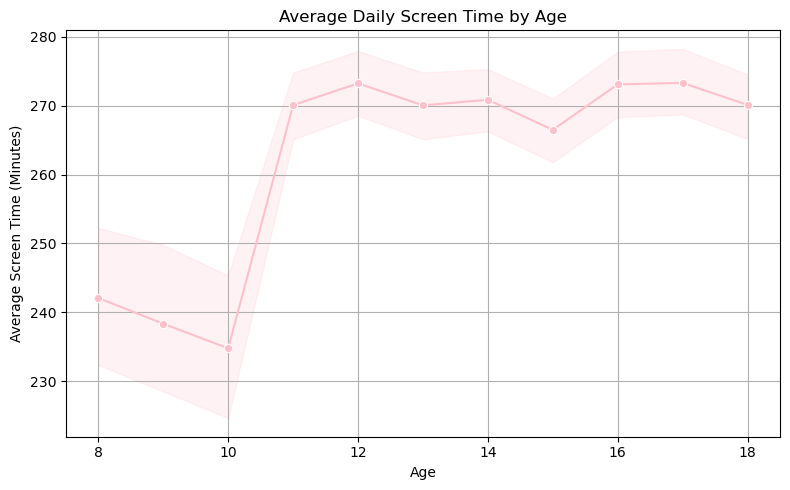

In [241]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='age', y='daily_screen_time_min', marker='o', color='pink')
plt.title('Average Daily Screen Time by Age')
plt.xlabel('Age')
plt.ylabel('Average Screen Time (Minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()

### 2. Primary Device Usage Distribution

This chart displays which digital devices are most commonly used by children for screen time. Understanding device preference helps identify exposure patterns and potential risks related to each type of screen.


C:\Users\bikha\AppData\Local\Temp\ipykernel_29068\1016042403.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=device_counts.index, y=device_counts.values, palette='Set2')


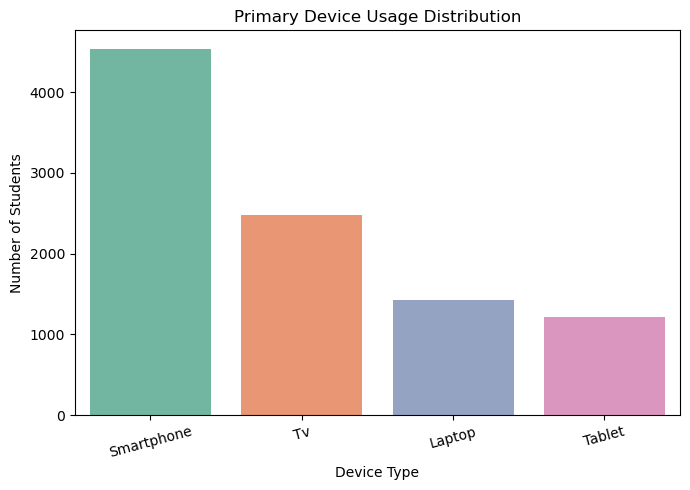

In [242]:
# Strip column names just in case
df.columns = df.columns.str.strip()

# Count the frequency of each device type
device_counts = df['primary_device'].value_counts()

# Plot
plt.figure(figsize=(7, 5))
sns.barplot(x=device_counts.index, y=device_counts.values, palette='Set2')
plt.title('Primary Device Usage Distribution')
plt.xlabel('Device Type')
plt.ylabel('Number of Students')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


### 3. Screen Time Risk Classification

This chart shows how children's screen time is distributed across different risk levels such as "Within Limit", "Slightly Over", and "Excessive Usage". These categories are based on age-adjusted screen time thresholds and help assess potential overuse and its implications.


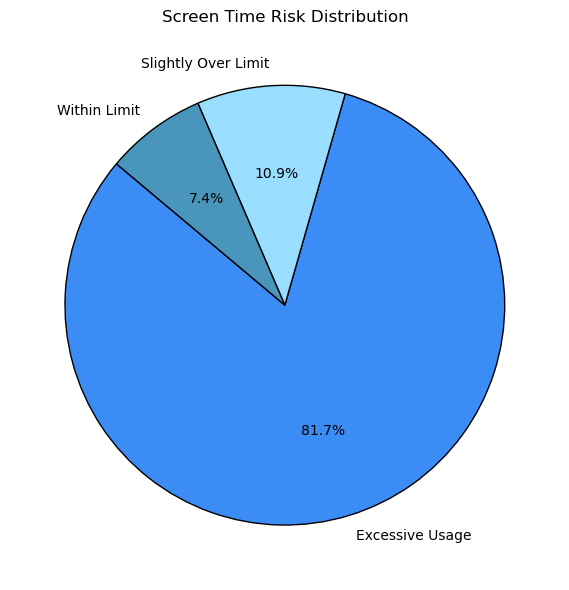

In [243]:
# Ensure column names are clean
df.columns = df.columns.str.strip()

# Count the number of students in each risk category
risk_counts = df['screen_time_risk'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
risk_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=140,
    colors=["#3C8CF6", "#99DDFF", "#4995BB"],
    labels=risk_counts.index,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Screen Time Risk Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()


C:\Users\bikha\AppData\Local\Temp\ipykernel_29068\2680317636.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=risk_counts.index, y=risk_counts.values, palette=["#3C8CF6", "#99DDFF", "#4995BB"])


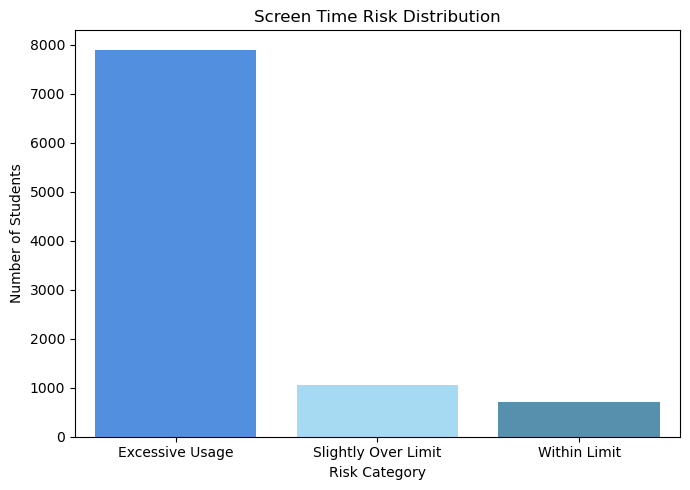

In [245]:
# Count risk category occurrences
risk_counts = df['screen_time_risk'].value_counts()

# Plot bar chart
plt.figure(figsize=(7, 5))
sns.barplot(x=risk_counts.index, y=risk_counts.values, palette=["#3C8CF6", "#99DDFF", "#4995BB"])
plt.title('Screen Time Risk Distribution')
plt.xlabel('Risk Category')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()


### 4. Age Group-wise Average Screen Time

This chart highlights the average daily screen time across different age groups. It helps identify which age brackets are most engaged with screens, allowing for targeted interventions and awareness efforts.



In [252]:
print(df.columns.tolist())


['age', 'gender', 'primary_device', 'educational_to_recreational_ratio', 'health_impacts', 'urban_or_rural', 'age_group', 'usage_category', 'health_impact_level', 'daily_screen_time_min', 'screen_time_risk']


C:\Users\bikha\AppData\Local\Temp\ipykernel_29068\2831414502.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_avg, x='age', y='daily_screen_time_min', palette='viridis')


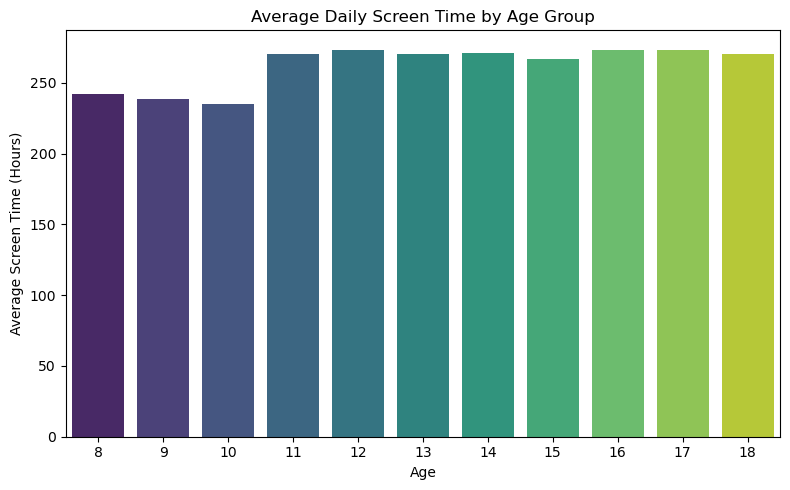

In [253]:
df.columns = df.columns.str.strip()

# Group by Age and calculate average screen time (in hours or minutes)
age_avg = df.groupby('age')['daily_screen_time_min'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=age_avg, x='age', y='daily_screen_time_min', palette='viridis')
plt.title('Average Daily Screen Time by Age Group')
plt.xlabel('Age')
plt.ylabel('Average Screen Time (Hours)')
plt.tight_layout()
plt.show()


### 5. Urban vs Rural Screen Time Trends

This chart compares average daily screen time between students from urban and rural backgrounds. It provides insights into how access, environment, and lifestyle may influence screen usage patterns across these regions.


C:\Users\bikha\AppData\Local\Temp\ipykernel_29068\3893208381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_avg, x='urban_or_rural', y='daily_screen_time_min', palette='pastel')


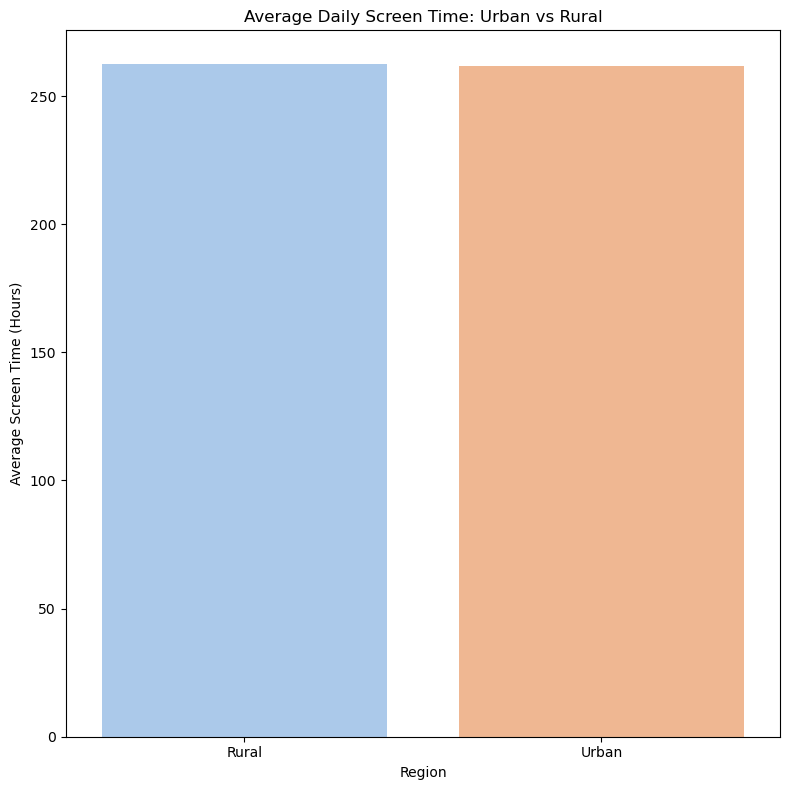

In [256]:
df.columns = df.columns.str.strip()

# Group by Region and calculate average screen time
region_avg = df.groupby('urban_or_rural')['daily_screen_time_min'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 8))
sns.barplot(data=region_avg, x='urban_or_rural', y='daily_screen_time_min', palette='pastel')
plt.title('Average Daily Screen Time: Urban vs Rural')
plt.xlabel('Region')
plt.ylabel('Average Screen Time (Hours)')
plt.tight_layout()
plt.show()
